In [1]:
#!/usr/bin/env python
#title           :function trace times (exit - entry).ipynb
#description     :This will create dict of function call times and plot
#author          :Alok Singh (Git: https://github.com/a1singh, Email: a1singh@eng.ucsd.edu)

import json
from pprint import pprint

In [2]:
with open('trace_entry_exit_0.json') as data_file:
    data = json.load(data_file)

In [3]:
len(data)

232164

In [4]:
pprint(data[226].keys())

dict_keys(['node-id', 'name', 'time', 'thread-id', 'event-type'])


In [5]:
pprint(data[5726])

{'event-type': 'entry',
 'name': 'INP_STRLEN [{inp.F} {1117,7}-{1133,9}] ',
 'node-id': '0',
 'thread-id': '0',
 'time': '2.0574e+06'}


In [6]:
def diff_secs(entry_time, exit_time):
    #
    return exit_time - entry_time

In [7]:
##################################################
from collections import deque

n_entry = 0
n_exit  = 0
f_calls = {}
d = deque()

for i in range(0,len(data)):
    if(data[i]['event-type'] == 'entry'):
        n_entry += 1
    elif data[i]['event-type'] == 'exit':
        n_exit += 1
    
    if(i%500 ==0):
        print('.', sep=' ', end='', flush=True)

    if(data[i]['event-type'] == 'entry'):
        d.append(data[i])
        # does this f already exist in dict: if yes: append
        keyy = data[i]['name']
        if(keyy in f_calls.keys()):
            f_calls[keyy].append([data[i]['time']]) #entry time
        else:
            f_calls[keyy] = []
            f_calls[keyy].append([data[i]['time']]) #entry time
        #if not add new list
    else: #exit
        d.pop() #pop the entry of this node

        # does this f already exist in dict: if yes: append
        keyy = data[i]['name']
        if(keyy in f_calls.keys()):
            L = f_calls[keyy]
            
            l = L[-1]
            
            # 
            if not (len(l)==1):
                print('ERROR: when logging exit time, len of l is not 1: check')
                break

            l.append(data[i]['time']) #exit time
            l.append(float(l[-1]) - float(l[-2]))
        else:
            print('Error: exit node found but entry key is missing in dict')
            break                

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
i = 0
x2 = []
y2 = []
for key, value in f_calls.items():
    x2.append(i)
    y2.append(len(value))
    i = i + 1

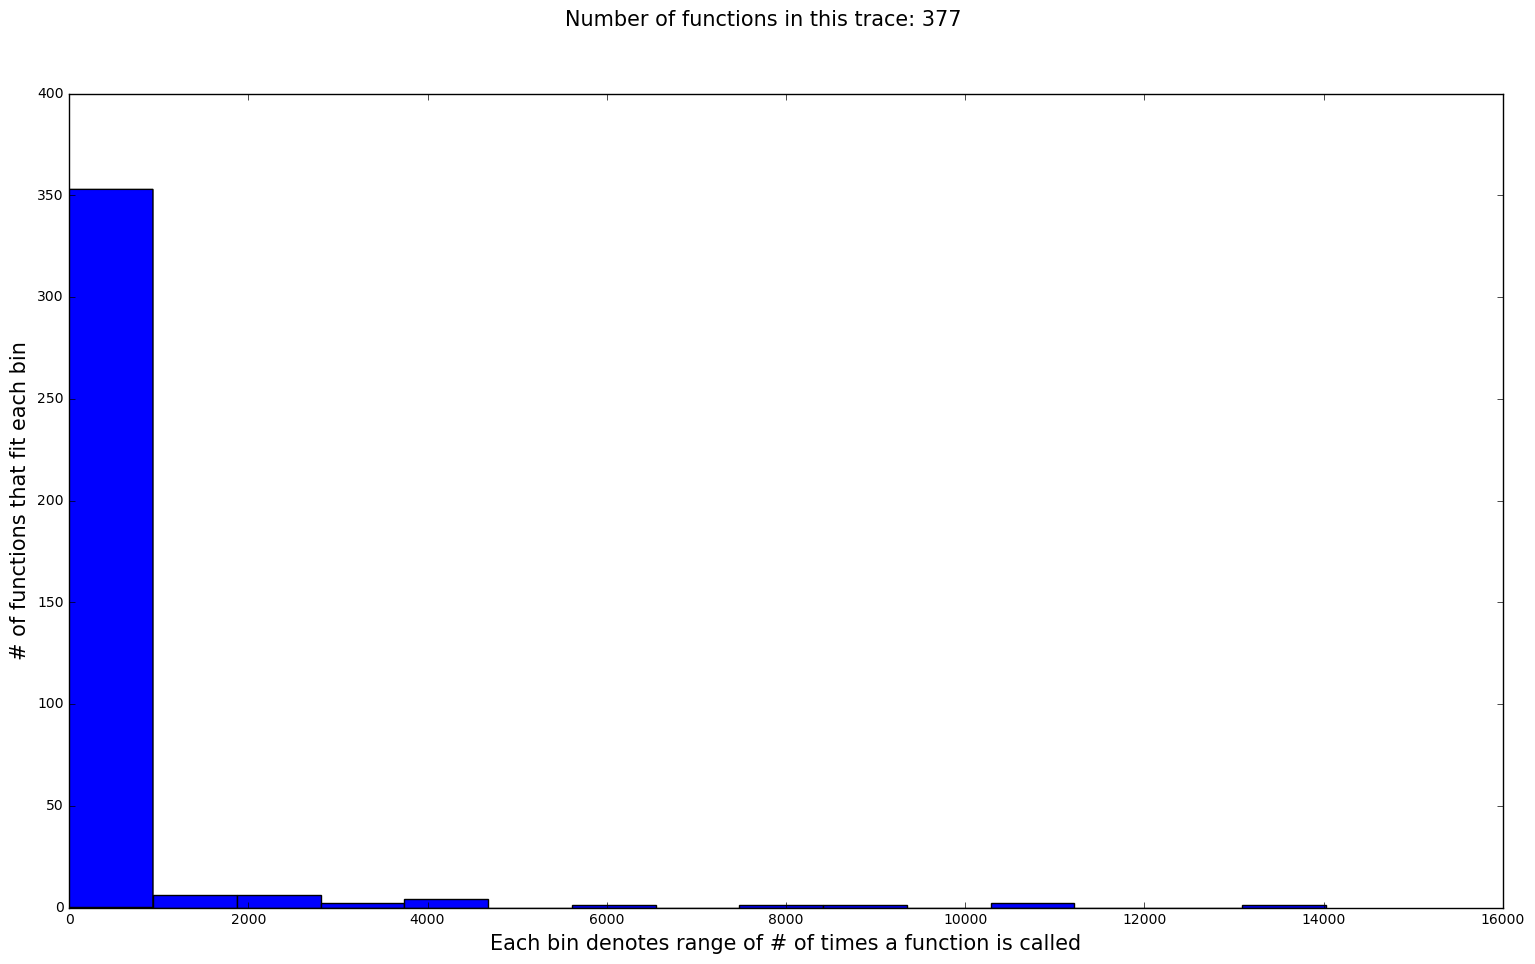

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(y2, normed=False, bins=15)
fig = plt.gcf()

fig_title = "Number of functions in this trace: " + str(len(f_calls))
fig.suptitle(fig_title, fontsize=15)

fig.set_size_inches(18.5, 10.5)
plt.ylabel('# of functions that fit each bin', fontsize=15);
plt.xlabel('Each bin denotes range of # of times a function is called', fontsize=15);

In [11]:
def filter_funcs(min = 0, max = float("inf") ):
    #filters functions based on number of times called
    
    global f_calls
    funcs_ = []
    time_  = []
    
    for key, value in f_calls.items():
        if len(value) > min and len(value) < max:
            new_list = []
            for v in value:
                new_list.append(v[2])
            funcs_.append(key)
            time_.append(new_list)
    return funcs_, time_

In [12]:
funcs_, time_ = filter_funcs(0, 100)
len(funcs_), len(time_)

(323, 323)

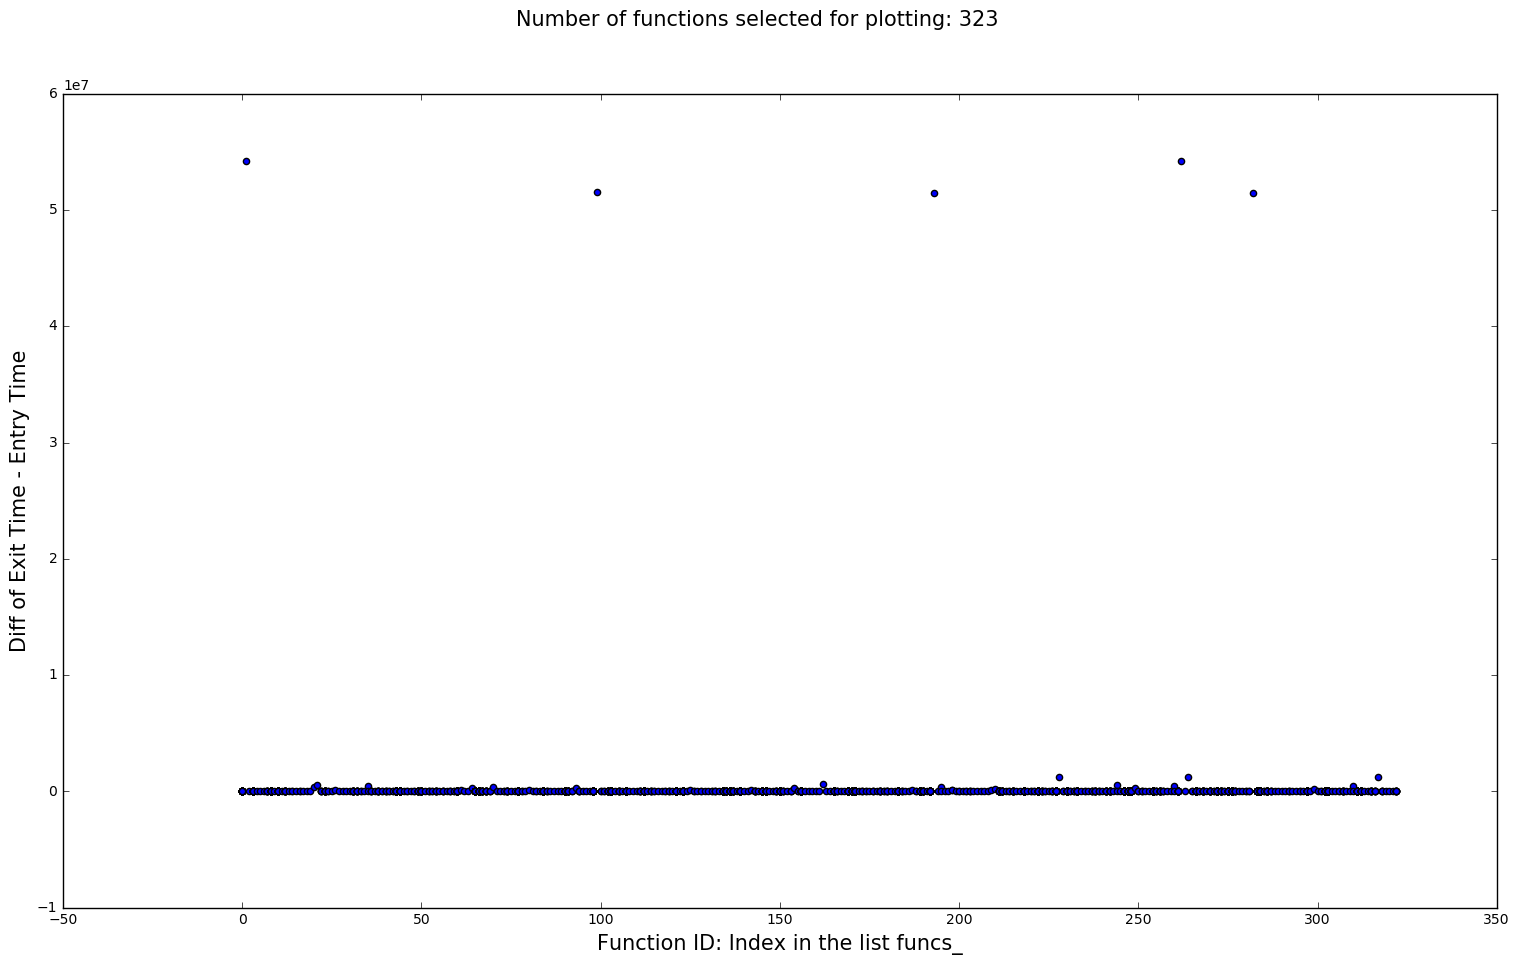

In [13]:
y = time_
x = [i for i in range(len(funcs_))]

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

fig_title = "Number of functions selected for plotting: " + str(len(funcs_))
fig.suptitle(fig_title, fontsize=15)

plt.ylabel('Diff of Exit Time - Entry Time', fontsize=15);
plt.xlabel('Function ID: Index in the list funcs_', fontsize=15);
plt.savefig('func_entry_exit1.png')
plt.show()

In [14]:
def filter_duration_funcs(min = 0, max = float("inf") ):
    #filters function calls based on total duration
    #if total ** duration ** of that specific call < threshold: ignore that data point
    
    global f_calls
    funcs_ = []
    time_  = []
    
    for key, value in f_calls.items():
        new_list = []
        for v in value:
            # add data point only if duration satisfies a condition
            if v[2] > min and v[2] < max:
                new_list.append(v[2])
        funcs_.append(key)
        time_.append(new_list)
    return funcs_, time_

In [15]:
# let us exclude points with HIGH duration in above graph

funcs_, time_ = filter_duration_funcs(0, 800000)
len(funcs_), len(time_)

(377, 377)

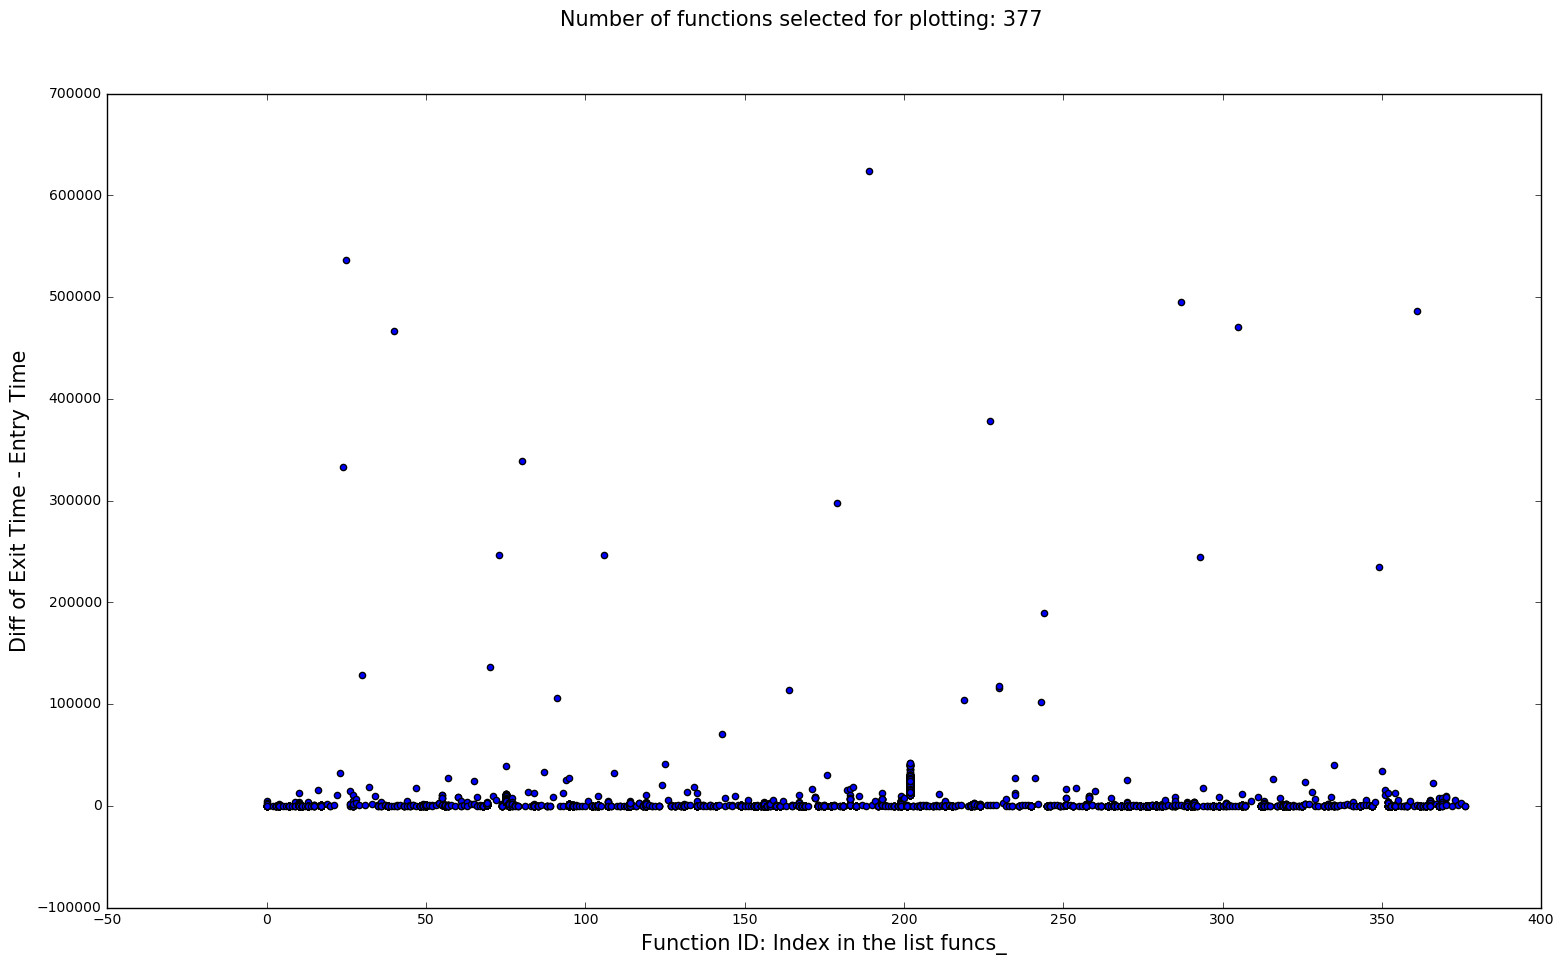

In [16]:
y = time_
x = [i for i in range(len(funcs_))]

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

fig_title = "Number of functions selected for plotting: " + str(len(funcs_))
fig.suptitle(fig_title, fontsize=15)

plt.ylabel('Diff of Exit Time - Entry Time', fontsize=15);
plt.xlabel('Function ID: Index in the list funcs_', fontsize=15);
plt.savefig('func_entry_exit2.png')
plt.show()